<a href="https://colab.research.google.com/github/love-bees/twitter/blob/master/twitter_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#tables
import pandas as pd
from collections import Counter
from prettytable import PrettyTable
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#map
from glob import glob
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
#cleaning text
import string
import regex as re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cicmila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cicmila/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#import data, name columns
data = pd.read_csv('tweets.csv', encoding='utf-8')
data.columns = ['id', 'time', 'geo', 'lang', 'hashtags', 'text']

In [0]:
data.head()

,id,time,geo,lang,hashtags,text
0,1248318627935182849,2020-04-09 18:35:28,"6.05861, -75.5031",es,b'jardin jardines huerta esposa love enamorado...,b'Ella! Siempre ella! Qui\xc3\xa9n no se enamo...
1,1248318622113693698,2020-04-09 18:35:26,"42.9607521, -80.05056563",en,b'',"b'Hey everyone , won\xe2\x80\x99t be streaming..."
2,1248318523908198400,2020-04-09 18:35:03,"38.7261, -9.1394",et,b'photodocumentary moon exterior isolation cov...,b'M O O N\n#photodocumentary\n#moon #exterior\...
3,1248318383763972100,2020-04-09 18:34:29,"53.55, -3.05",en,b'covid postcovid19 quarantine dogs',b'\xf0\x9f\xa6\xaeTop Tip Thursday \xf0\x9f\x9...
4,1248318271801053185,2020-04-09 18:34:03,"18.4596876, -69.9485084",es,b'',b'El bolet\xc3\xadn 21 con r\xc3\xa9cord de ca...


In [0]:
#get only english tweets
text = []
date = []
hashes = []
geo = []
for i, item in enumerate(data['lang']):
    if data['lang'][i] == 'en':
        text.append(data['text'][i])
        date.append(data['time'][i])
        hashes.append(data['hashtags'][i])
        geo.append(data['geo'][i])

In [0]:
#cleanup working
for i in range(len(text)):
    try:
        text[i] = bytes(text[i][2:-2], 'utf-8').decode('unicode_escape')
        hashes[i] = bytes(hashes[i][2:-1], 'utf-8').decode('unicode_escape')
        text[i] = re.sub(r'[^\x00-\x7F]+','', text[i])
        text[i] = text[i][:text[i].index('https://t.co/')]
        text[i] = text[i].replace("\n", '')
        #text[i]  = "".join([char for char in text[i] if char not in string.punctuation])
        #text[i] = [word for word in text[i] if word not in stopwords.words()]
        #text[i] = word_tokenize(text[i])
    except:
        continue

In [0]:
hashtags = []
for item in hashes:
    hashtags.append(item)
hashes_single = []
for i,h in enumerate(hashtags):
    if h == '':
        continue
    else:
        hashes_single.append(hashtags[i].split())
h = []
for i in hashes_single:
    for j in i:
        h.append(j.lower())

In [0]:
hashes_single = pd.Series(h)
#hashes_single

In [0]:
hashes_single.describe()

count        10524
unique        5258
top       covid_19
freq           619
dtype: object

In [0]:
#turn into dataframe
df = pd.DataFrame(columns=['datetime','coordinates','hashes', 'text'])
df['datetime'], df['coordinates'],df['hashes'], df['text'] = [date, geo, hashes, text]

In [0]:
df

,datetime,coordinates,hashes,text
0,2020-04-09 18:35:26,"42.9607521, -80.05056563",,"Hey everyone , wont be streaming until this wh..."
1,2020-04-09 18:34:29,"53.55, -3.05",covid postcovid19 quarantine dogs,"Top Tip Thursday Once lockdown is over, have ..."
2,2020-04-09 18:48:31,"40.89245946, -74.13999694",,Palestinian national heroine Bisan Al-Jubeh (u...
3,2020-04-09 18:48:21,"21.31752233, -157.92366028",harley808 zeus808 storm808 lovemydogs thursday...,Thankful Thursday #harley808 #zeus808 #storm80...
4,2020-04-09 18:47:04,"48.47593351, -81.32806152",,Neighbourhood getting loud for healthcare work...
5,2020-04-09 18:46:22,"33.19277, -96.99155",whatdayisit covid shelterinplace kmarkrealtor ...,Its Thursday in case anyone was wondering #wha...
6,2020-04-09 18:45:39,"33.67, -117.78",,From @ienearth MONDAY APRIL 13THJoin Indigenou...
7,2020-04-09 18:45:19,"40.0675, -82.5122",,covid-19 pandemic quarantinethese arethe peopl...
8,2020-04-09 18:44:30,"51.60832483, -0.039755",,Today U-Build and @Buildingbloqs joined the na...
9,2020-04-09 18:44:12,"29.9014205, -97.99685148",,"Join us in ringing bells to thank our doctors,..."


In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/cicmila/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
def analyze_sentiment(text):
    '''
    Utility function to classify the polarity of a tweet
    using nltk. analysis variable returns the following dict: 
    {'neg': 0.122, 'neu': 0.641, 'pos': 0.237, 'compound': 0.4215}
    The compound value here conveys the overall positive or negative user experience.
    Examples: 
    https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer
    https://opensourceforu.com/2016/12/analysing-sentiments-nltk/
    '''
    analysis = analyzer.polarity_scores(text)
    
    return analysis['compound']

In [0]:
df['score_sentiment'] = df['text'].apply(analyze_sentiment)

In [0]:
df['text'][11]

'This is a very sad day for us. Our dear Roy who has been a member of @lanewyorkina family for years, unfortunately lost his mother to COVID-19. She was so loving and kind and that love truly echoes through him. '

Positive tweet: Due to Covid we are unable to borrow dresses for Lotto at the moment, but this week I was SO kindly gifted this dress from Sunshine Coast label loulouaustralia thank you for the lovely surprise. And thanks to 

Neutral tweet: Its Thursday in case anyone was wondering #whatdayisit #covid #shelterinplace #kmarkrealtor #era #workweek #staysafe @ Oak Point, Texas 

Negative tweet: Stupid, worthless, no good, goddamn, freeloading son of a bitch. Retarded, big mouth, know-it-all, asshole, jerk. You forgot ugly, lazy and disrespectful. #childofthe80s #genx #stayhome #staysafe #covid_19 #covid19 


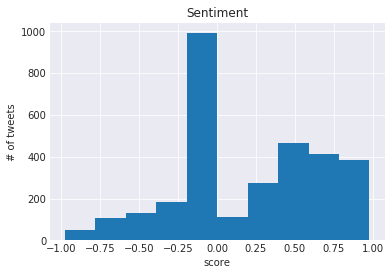

In [0]:
sns.set_style("darkgrid")

df['score_sentiment'].hist()
plt.title('Sentiment')
plt.ylabel('# of tweets')
plt.xlabel('score')
print('Positive tweet:', df['text'][df['score_sentiment'].values.argmax()])
print('')
print('Neutral tweet:', df['text'][5])
print('')
print('Negative tweet:', df['text'][df['score_sentiment'].values.argmin()])

In [0]:
def sentiment_score(compound):
    if compound > 0.5:
        return 1
    elif compound < -0.5:
        return -1
    else:
        return 0

In [0]:
df['tweet_sentiment_score'] = df['score_sentiment'].apply(sentiment_score)
df['tweet_sentiment_score'].value_counts()

 0    1908
 1     990
-1     217
Name: tweet_sentiment_score, dtype: int64

In [0]:
def sentiment_label(score):
    if score == 1:
        return 'positive'
    elif score == -1:
        return 'negative'
    else:
        return 'neutral'

In [0]:
df['tweet_sentiment_label'] = df['tweet_sentiment_score'].apply(sentiment_label)

In [0]:
df['tweet_sentiment_label'].value_counts()

neutral     1908
positive     990
negative     217
Name: tweet_sentiment_label, dtype: int64

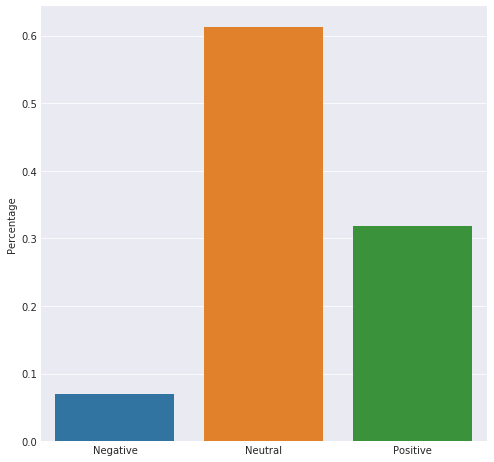

In [0]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.tweet_sentiment_score.value_counts(normalize=True)
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.savefig('sentiment.png')

In [0]:
df['text'][3088]

'While we look for signs that weve reached a plateau in cases of COVID-19, the concern and fear of what will happen as businesses open up again is on all of our minds. This causes confusion about what an economic '

In [0]:
for label,item in (('language', data['lang']), ('hashtags', hashes_single), ('score', df['tweet_sentiment_score']), ('country', data_frame['country'])):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(item)
    [pt.add_row(kv) for kv in c.most_common()[:10]] 
    pt.align[label],pt.align['Count']='l','r'
    print(pt)

In [0]:
df

Text(0.5,0,'Hashtag')

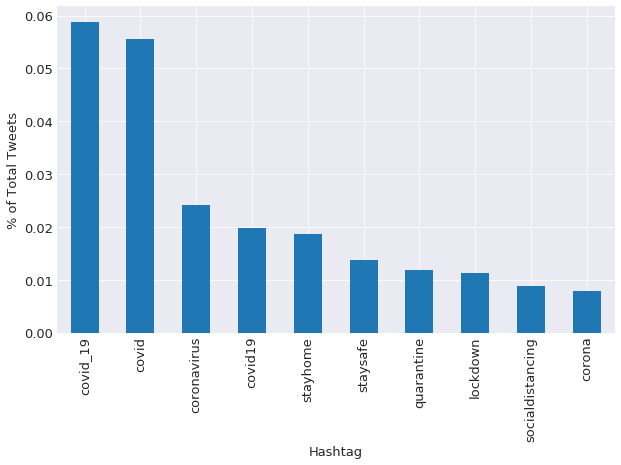

In [0]:
sns.set_style("darkgrid")

x = hashes_single
#x = x[x!='covid']
#x = x[x!='coronavirus']
#x = x[x!='covid19']
#x = x[x!='coviìd19']
#x = x[x!='corona']


x = x.value_counts(1).head(10)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='C0')
plt.ylabel('% of Total Tweets', fontsize=13)
plt.xlabel('Hashtag', fontsize=13)

Text(0.5,0,'Language')

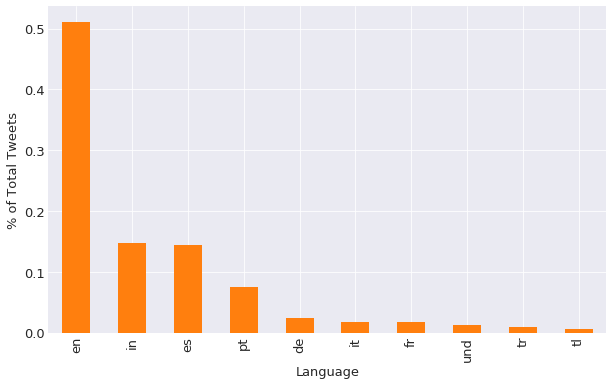

In [0]:
sns.set_style("darkgrid")
x = data['lang'].value_counts(1).head(10)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='C1')
plt.ylabel('% of Total Tweets', fontsize=13)
plt.xlabel('Language', fontsize=13)

In [0]:
coordinates = []
for i,pair in enumerate(df['coordinates']):
    coordinates.append(df['coordinates'][i].split(','))

In [0]:
coordinates = [[float(j) for j in i] for i in coordinates]

In [0]:
zoom_start = 3

m = folium.Map(zoom_start=zoom_start, tiles='stamentoner',)

HeatMap(coordinates).add_to(m)
m.save('map.html')

In [0]:
df.describe()

,score_sentiment,tweet_sentiment_score
count,3115.000000,3115.000000
mean,0.224275,0.248154
std,0.441866,0.570968
min,-0.976900,-1.000000
25%,0.000000,0.000000
50%,0.154300,0.000000
75%,0.599850,1.000000
max,0.980000,1.000000


In [0]:
hashes_single.describe()

count        10524
unique        5258
top       covid_19
freq           619
dtype: object

In [0]:
data_frame = pd.DataFrame(columns=("X", "Y"), data=coordinates)

In [0]:
zoom_start = 3

m = folium.Map(zoom_start=zoom_start, tiles='StamenWatercolor',)

HeatMap(data_frame,radius=20, blur=10).add_to(m)
m.save('map.html')

In [0]:
from geopy.geocoders import Nominatim

In [0]:
geolocator = Nominatim(user_agent="corona_map_sentiment")

In [0]:
location = []
for i in range(len(data_frame)):
    loc = str(data_frame.iloc[i][0])+", "+str(data_frame.iloc[i][1])
    loc = str(geolocator.reverse(loc))
    loc = loc.split(", ")[-1]
    location.append(loc)

GeocoderUnavailable: Service not available

In [0]:
data_frame['country'] = location if location == 'United States of America'

In [0]:
data_frame['score'] = df['score_sentiment']

In [0]:
sns.set_style("darkgrid")
x = data_frame['country'].value_counts(1).head(10)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='C2')
plt.ylabel('% of Total Tweets', fontsize=13)
plt.xlabel('Language', fontsize=13)

In [0]:
#data_frame = data_frame['country'] == usa

In [0]:
data_frame

In [0]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [0]:
the_map = folium.Map(tiles="cartodbpositron")
the_map.choropleth(
    geo_data=country_shapes,
    name='choropleth',
    data=data_frame,
    columns=['country', 'score'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    nan_fill_color='white',
    fill_opacity=0.7,
    line_opacity=0.2,
)
the_map